## k-means clustering on sklearn breast cancer dataset

Resources:

[K-means clustering on high dimensional data (Wine dataset example)](https://medium.com/swlh/k-means-clustering-on-high-dimensional-data-d2151e1a4240)
([See code](https://github.com/Shivangi0503/Wine_Clustering_KMeans/blob/main/WineClustering.py))

[Four mistakes in clustering you should avoid](https://towardsdatascience.com/common-mistakes-in-cluster-analysis-and-how-to-avoid-them-eb960116d773)

In [39]:
from sklearn.datasets import load_breast_cancer

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [41]:
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

### Pre-processing

In [42]:
# Scaling the data (standardize the features for Euclidean distance in k-means)

#Computes mean and std for each feature
scaler = StandardScaler().fit(df.values)
#Transforms data 
scaled_data = scaler.transform(df.values)
scaled_df = pd.DataFrame(data=scaled_data, columns=df.columns)
#scaled_df['target'] = pd.Series(cancer_data.target)
scaled_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


### Data exploration: Visualize in 2D with PCA dimensionality reduction

In [43]:
# Dimensionality reduction of data
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_data, columns=['component_1', 'component_2'])

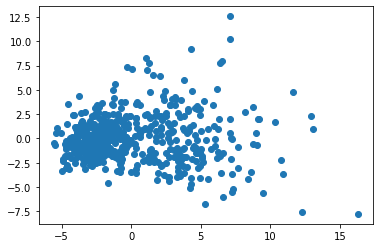

In [44]:
# Generating plot
plt.scatter('component_1', 'component_2', data=pca_df)
plt.show()

### Elbow method: Determining value of k

For this estimation, we'll run k-means on the PCA-reduced data (faster) for several values of k

Inertia: sum of squared distances of each point from the centroid of its cluster (low inertia = good clustering)

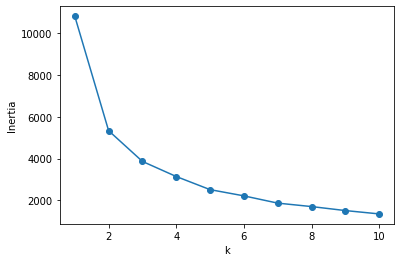

In [45]:
inertias = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, init='random', 
            n_init=10, max_iter=300, 
            tol=0.001, random_state=0)
  km.fit(pca_data)
  inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

Looks like k=2 (or maybe k=3) is where the inertia stops decreasing as sharply.

### K-means clustering of scaled data

We are assuming k=2, based on our estimation above.

In [46]:
km = KMeans(n_clusters=2, init='random', 
            n_init=10, max_iter=300, 
            tol=0.001, random_state=0)
km.fit(scaled_data)

KMeans(init='random', n_clusters=2, random_state=0, tol=0.001)

In [47]:
predictions = km.predict(scaled_data)
pca_df['cluster'] = pd.Series(predictions, index=scaled_df.index)

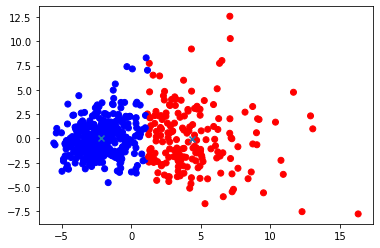

In [48]:
colors = {0: 'red', 1: 'blue'}
plt.scatter('component_1', 'component_2', data=pca_df, c=pca_df['cluster'].map(colors)) #graph points colored by cluster
centroids = pca.transform(km.cluster_centers_) #transform centroids to 2d space also
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x')
plt.show()

We have 2 clusters (red and blue). Their centroids are marked by x's.

### Do our results correlate with the known categories?


In [49]:
pca_df['target'] = pd.Series(cancer_data.target, index=pca_df.index)

def is_match(row):
  return row['target'] == row['cluster']

pca_df['match'] = pca_df.apply(lambda row: is_match(row), axis=1)
pca_df

,component_1,component_2,cluster,target,match
0,9.192837,1.948583,0,0,True
1,2.387802,-3.768172,0,0,True
2,5.733896,-1.075174,0,0,True
3,7.122953,10.275589,0,0,True
4,3.935302,-1.948072,0,0,True
...,...,...,...,...,...
564,6.439315,-3.576817,0,0,True
565,3.793382,-3.584048,0,0,True
566,1.256179,-1.902297,0,0,True
567,10.374794,1.672010,0,0,True


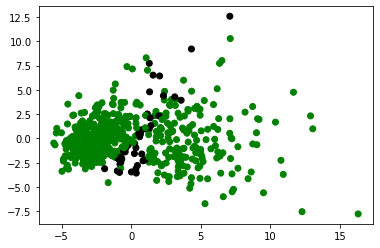

In [50]:
colors = {True: 'green', False: 'black'}

plt.scatter('component_1', 'component_2', data=pca_df, c=pca_df['match'].map(colors), marker='o')

plt.show()

Green indicates that the clustering matched the target labels, black indicates that it did not. Our clustering did pretty well, with only a few points located between the clusters that were labeled incorrectly.

### Interpreting our results

Resources:
[Grouped bar chart with labels](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html)

What is the biological meaning of our clusters? What features distinguish them? First let's examine the centroids.

In [75]:
labels = scaled_df.columns
center0 = scaler.inverse_transform(km.cluster_centers_[0].reshape(1, -1))
center1 = scaler.inverse_transform(km.cluster_centers_[1].reshape(1, -1))
centers_df = pd.DataFrame({'cluster0': center0.flatten(),
                           'cluster1': center1.flatten()},
                           index=labels)
centers_df['ratio'] = centers_df['cluster0'] / centers_df['cluster1']
centers_df = centers_df.sort_values('ratio', ascending=False)
centers_df = centers_df.transpose()
centers_df

,mean concavity,mean concave points,area error,worst concavity,worst concave points,worst area,perimeter error,concavity error,worst compactness,radius error,...,worst symmetry,worst texture,mean texture,worst smoothness,mean symmetry,mean smoothness,symmetry error,mean fractal dimension,texture error,smoothness error
cluster0,0.179555,0.094069,77.020942,0.489863,0.189883,1451.233862,4.603889,0.051102,0.403735,0.643062,...,0.327004,28.786402,21.358836,0.146245,0.197901,0.104921,0.021702,0.064577,1.240411,0.007092
cluster1,0.043661,0.026463,22.091684,0.163924,0.077166,596.759474,2.001718,0.022340,0.179923,0.286853,...,0.271709,24.130816,18.260500,0.125467,0.172836,0.092102,0.019966,0.061913,1.205137,0.007016
ratio,4.112514,3.554682,3.486422,2.988353,2.460714,2.431857,2.299969,2.287470,2.243926,2.241785,...,1.203508,1.192931,1.169674,1.165608,1.145020,1.139183,1.086954,1.043032,1.029269,1.010924


### Thoughts on exercise
One assumption made here by using unweighted Euclidean distance to measure similarity was that every feature in the dataset is of equal importance to its classification. We have a variety of features, which include mean, error, and "worst" for each variable. It is probably not a correct assumption that each of these would contribute equally to the classification. We could have accounted for this by training our k-means model on the PCA-reduced data, using a subset of components that explain the most variance in the data. However, using a smaller number of components would have resulted in lost information.

Another choice made was to use k=2 for the cluster analysis. The reasons included: looking at the 2D PCA representation of the data, the "elbow" method for choosing k, and already knowing that the dataset was labeled with two categories, "malignant" or "benign". Sometimes in cluster analysis we do not have a ground truth like this for determining how many clusters there should be. Also, if our background knowledge about how many clusters we expect to see is flawed, our analysis might reflect that assumption rather than the true underlying structure of the data. In this case, though, it's reasonable to assume that the data will cluster into "malignant" and "benign".

What else could we do with this dataset? We can try applying logistic regression to differentiate the two classes. The approach: split the data into training and test sets, fit a logistic regression model on the training data (using methods possibly including maximum likelihood estimation, gradient descent, or stochastic gradient descent), then test it on the test data.